In [50]:
import sys
sys.path.append("../..")
import torch
from src.distill_datasets import LmdbDataset
import matplotlib.pyplot as plt
import lmdb
import pickle
from tqdm import tqdm
# import seaborn as sns

In [73]:
fd_dataset = LmdbDataset(
    folder_path="/home/yuejian/project/MLFF-distill/subsets/mirror/final_labels/force_jacobians",
)

# autogd_dataset = LmdbDataset(
#     folder_path="/home/yuejian/project/MLFF-distill/subsets/OMol_subset_label_torch_autograd/protein_ligand_pockets_train_4M/final_labels/force_jacobians",
# )

t_fd_dataset = LmdbDataset(
    folder_path="/home/yuejian/project/MLFF-distill/subsets/OMol_subset_label_finite_difference_transposed/protein_ligand_pockets_train_4M/final_labels/force_jacobians",
)

Total entries across all LMDB files jacs: 20137
Total entries across all LMDB files jacs: 20137


In [75]:
for i in range(10):
    fd_data = fd_dataset[i]
    dlen = int(fd_data.shape[0]**0.5)
    fd_data = fd_data.reshape(dlen,dlen)

    t_fd_data = t_fd_dataset[i]
    t_dlen = int(t_fd_data.shape[0]**0.5)
    t_fd_data = t_fd_data.reshape(t_dlen, t_dlen)
    
    # print(t_fd_data)
    print((fd_data - t_fd_data.T).abs().sum())

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)


In [72]:
env = lmdb.open("/home/yuejian/project/MLFF-distill/subsets/OMol_subset_label_finite_difference_transposed/protein_ligand_pockets_train_4M/final_labels/force_jacobians/data0000.lmdb", map_size=1099511627776 * 2)  # ~1 GB


for i,data in tqdm(enumerate(fd_dataset),total=len(fd_dataset)):
    with env.begin(write=True) as txn:
        idx = str(int(i))
        d_len = int(data.shape[0]**0.5)
        data = data.reshape(d_len,d_len).T.reshape(-1)
        txn.put(idx.encode(), data.T.numpy().tobytes())

env.close()

100%|██████████| 20137/20137 [02:23<00:00, 140.24it/s]


In [71]:
for d in fd_dataset:
    print(d.reshape(-1).shape)
    break

torch.Size([1028196])


In [38]:
for i in range(100):
    # finite difference
    dlen = int(fd_dataset[i].shape[0]**0.5)
    fd_test = fd_dataset[i].reshape(dlen,dlen)

    # autograd
    dlen_autogd = int(autogd_dataset[i].shape[0]**0.5)
    autogd_test = autogd_dataset[i].reshape(dlen_autogd,dlen_autogd)

    print((fd_test.T - fd_test).abs().sum(), (autogd_test.T - autogd_test).abs().sum())
    print((fd_test.T - fd_test).abs().mean(), (autogd_test.T - autogd_test).abs().mean())
    print("size", fd_test.shape, autogd_test.shape)
    print((((((fd_test.T - fd_test).abs().sum()-(autogd_test.T - autogd_test).abs().sum()) / (fd_test.T - fd_test).abs().sum())*100)).item())

    print("\n")

tensor(22201.5391) tensor(22469.8516)
tensor(0.0216) tensor(0.0219)
size torch.Size([1014, 1014]) torch.Size([1014, 1014])
-1.208531141281128


tensor(6415.7686) tensor(6571.9238)
tensor(0.0204) tensor(0.0209)
size torch.Size([561, 561]) torch.Size([561, 561])
-2.433929443359375


tensor(2727.4102) tensor(3006.8000)
tensor(0.0374) tensor(0.0412)
size torch.Size([270, 270]) torch.Size([270, 270])
-10.243780136108398


tensor(5724.7803) tensor(6273.8237)
tensor(0.0255) tensor(0.0279)
size torch.Size([474, 474]) torch.Size([474, 474])
-9.590646743774414


tensor(2042.3041) tensor(2330.2681)
tensor(0.0438) tensor(0.0499)
size torch.Size([216, 216]) torch.Size([216, 216])
-14.099957466125488


tensor(6998.8301) tensor(7296.6274)
tensor(0.0215) tensor(0.0225)
size torch.Size([570, 570]) torch.Size([570, 570])
-4.2549591064453125


tensor(11606.4990) tensor(11988.6924)
tensor(0.0217) tensor(0.0224)
size torch.Size([732, 732]) torch.Size([732, 732])
-3.2929253578186035


tensor(11158.2500) ten

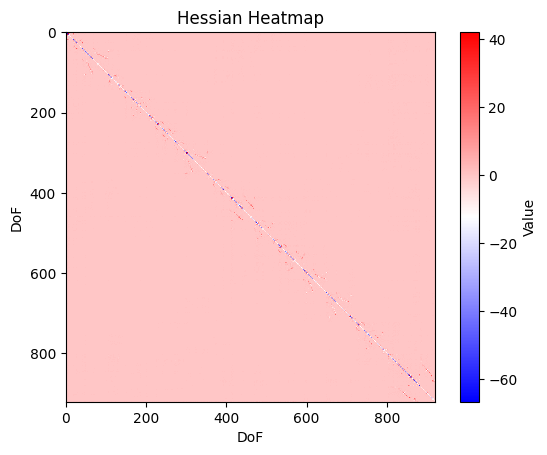

In [41]:
plt.imshow(fd_test, cmap='bwr', interpolation='nearest')
plt.colorbar(label='Value')
plt.title("Hessian Heatmap")
plt.xlabel("DoF")
plt.ylabel("DoF")
plt.show()

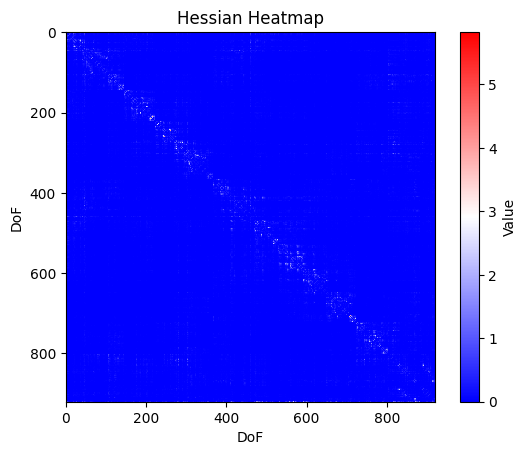

In [46]:
plt.imshow((fd_test-fd_test.T).abs(), cmap='bwr', interpolation='nearest')
plt.colorbar(label='Value')
plt.title("Hessian Heatmap")
plt.xlabel("DoF")
plt.ylabel("DoF")
plt.show()